# Optimization Algorithms

### A comparison between Batch Gradient Descent, Stochastic Gradient Descent, Gradient Descent with Momentum, RMSProp and ADAM Algorithms

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression


## Generate Synthetic Data for Regression

In [ ]:
x1 = np.random.randint(1,30,200000)
x2 = np.random.randint(1,30,200000)

y = 4 + 2 * x1 + 3 * x2 + 3 * np.random.random(200000)

In [ ]:
x1.shape

(200000,)

In [ ]:
y.shape

(200000,)

In [ ]:
w = np.random.random(3)
w

array([0.72989424, 0.75865524, 0.9574557 ])

## Put data in a DataFrame

In [ ]:
x = pd.DataFrame({'const':np.ones(200000),'x1':x1,'x2':x2})

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   const   200000 non-null  float64
 1   x1      200000 non-null  int64  
 2   x2      200000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


In [ ]:
x.describe()

,const,x1,x2
count,200000.0,200000.00000,200000.000000
mean,1.0,15.04008,14.979070
std,0.0,8.36361,8.365963
min,1.0,1.00000,1.000000
25%,1.0,8.00000,8.000000
50%,1.0,15.00000,15.000000
75%,1.0,22.00000,22.000000
max,1.0,29.00000,29.000000


In [ ]:
x.head()

,const,x1,x2
0,1.0,4,21
1,1.0,12,22
2,1.0,7,5
3,1.0,3,14
4,1.0,5,16


In [ ]:
x.iloc[:,:]

,const,x1,x2
0,1.0,4,21
1,1.0,12,22
2,1.0,7,5
3,1.0,3,14
4,1.0,5,16
...,...,...,...
199995,1.0,9,3
199996,1.0,2,2
199997,1.0,29,8
199998,1.0,15,9


## Estimate Parameter values by Fitting a LinearRegression model from Scikitlearn



In [ ]:
lr = LinearRegression()
lr.fit(x.iloc[:,1:],y)


LinearRegression()

In [ ]:
w_sklearn = [lr.intercept_] + list(lr.coef_)
w_sklearn

[5.498936028715093, 2.0005180395657134, 2.999456035556803]

## Paramter Estimation with Gradient Descent

In [ ]:
def mypred(features,weights):
    preds=np.dot(features,weights)
    return(preds)

In [ ]:
mypred(x,w).shape

(200000,)

In [ ]:
def myerror(target,features,weights):
    preds=mypred(features,weights)
    errors=target-preds
    return(errors)

In [ ]:
myerror(y,x,w)

array([51.97245564, 63.23985844, 23.11994924, ..., 56.14571019,
       42.43953493, 43.86780419])

In [ ]:
def mycost(target,features,weights):
    errors=myerror(target,features,weights)
    #print(errors.shape)
    #print(errors)
    cost=np.dot(errors.T,errors)  # Squared error values summed up
    return(cost)

In [ ]:
def gradient(target,features,weights):
    errors=myerror(target,features,weights)
    grad=-np.dot(features.T,errors)/features.shape[0]
    return(grad)

In [ ]:
gradient(y,x,w)

array([  -59.79111969, -1007.04864294, -1043.43274323])

## Batch Gradient Descent

In [ ]:
def my_lr_gd(target,features,learning_rate,num_steps):
    weights=np.random.random(features.shape[1])
    cost=[]
    for i in range(num_steps):
        weights-=learning_rate*gradient(target,features,weights)
        cost.append(mycost(target,features,weights))
    return(cost,weights)

In [ ]:
cost_gd,w_gd=my_lr_gd(y,x,.001,1000)

In [ ]:
w_gd

array([0.94258367, 2.1313725 , 3.13185332])

In [ ]:
w_sklearn/w_gd

array([5.83843681, 0.9382775 , 0.95792667])

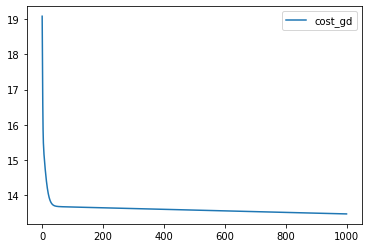

In [ ]:
np.log(pd.DataFrame({'cost_gd':cost_gd})).plot()

## Stochastic Gradient Descent

In [ ]:
def my_lr_sgd(target,features,learning_rate,num_steps):
    cost=[]
    weights=np.random.random(features.shape[1])
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10) # Randomly chosen 10 data points
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        weights -= learning_rate*gradient(target_sub,features_sub,weights)
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [ ]:
cost_sgd,w_sgd=my_lr_sgd(y,x,.001,1000)

In [ ]:
w_sgd

array([1.100805  , 2.12606574, 3.13094132])

In [ ]:
w_sklearn/w_sgd

array([4.99926436, 0.94061949, 0.9582057 ])

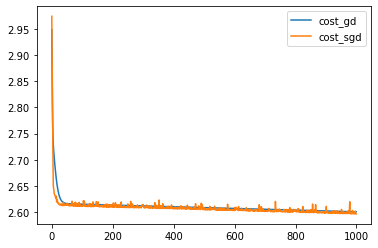

In [ ]:
np.log(pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd)})).plot()

## Gradient Descent with Momentum

In [ ]:
def my_lr_mom(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    vw=np.zeros(features.shape[1])
    beta=0.9
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10) # Randomly chosen 10 data points
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:] # Randomly chosen 10 data points
        
        vw=beta*vw+(1-beta)*gradient(target_sub,features_sub,weights)
        
        vw_a=vw/(1-beta**(i+1)) # Bias correction
        
        weights -= learning_rate*vw_a
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [ ]:
cost_mom,w_mom=my_lr_mom(y,x,.01,1000)

In [ ]:
w_mom

array([4.4471949 , 2.04954588, 3.04026706])

In [ ]:
w_sklearn/w_mom

array([1.23745762, 0.97573755, 0.98678365])

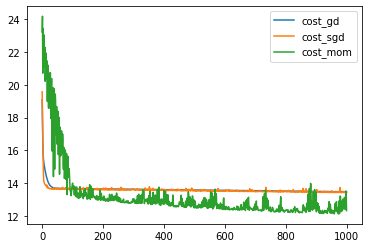

In [ ]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom})).plot()

### RMSProp

In [ ]:
def my_lr_rms(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    sw=np.zeros(features.shape[1])
    
    beta=0.99

    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10) # Randomly chosen 10 data points
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        sw=beta*sw+(1-beta)*(gd**2)
        
        sw_a=sw/(1-beta**(i+1))
        
        weights -= learning_rate*(gd/(np.sqrt(sw_a)+1e-15))
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [ ]:
cost_rms,w_rms=my_lr_rms(y,x,.1,1000)

In [ ]:
w_rms

array([5.4798822 , 2.06946984, 3.0565902 ])

In [ ]:
w_sklearn/w_rms

array([1.00425794, 0.96634357, 0.98151392])

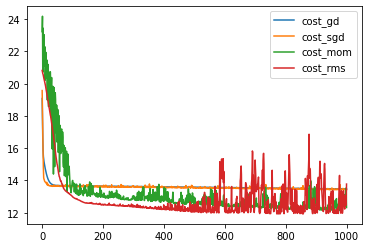

In [ ]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms})).plot()

## ADAM

In [ ]:
def my_lr_adam(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    sw=np.zeros(features.shape[1])
    vw=np.zeros(features.shape[1])
    beta1=0.9
    beta2=0.99
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10) # Randomly chosen 10 data points
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        vw=beta1*vw+(1-beta1)*gd
        sw=beta2*sw+(1-beta2)*(gd**2)
        
        vw_a=vw/(1-beta1**(i+1))
        sw_a=sw/(1-beta2**(i+1))
        
        weights = weights - learning_rate*(vw_a/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [ ]:
cost_adam,w_adam=my_lr_adam(y,x,.1,1000)

In [ ]:
w_adam

array([5.41749711, 1.99949467, 3.01158375])

In [ ]:
w_sklearn/w_adam

array([1.01582246, 1.00016214, 0.9961821 ])

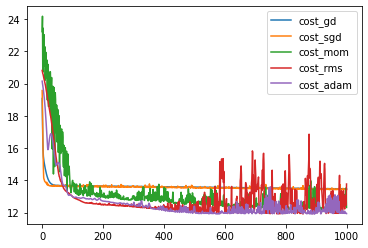

In [ ]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms,'cost_adam':cost_adam})).plot()